### Exploring fatalities and crashes across time
- Objective is to find operators with the highest number of crashes 
- Select top 5 and observe across decade

In [48]:
import pandas as pd
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter

In [49]:
df = pd.read_json("data/silver/1920_2024.json")
df.Date = pd.to_datetime(df.Date)
stop_words = set(stopwords.words("english"))

In [50]:
df_1 = df.dropna(axis=0,how="any",subset=["Summary"])
df_1[:2]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military
0,1950,1953-01-05,2139,"Belfast, Northern Ireland",British European Airways,None,Northolt - Belfast,Vickers Viking 610-1B,G-AJDL,262,"{'total': 35, 'passengers': 31, 'crew': 4}","{'total': 27, 'passengers': 24, 'crew': 3}",0.0,Crashed into approach lights while attempting ...,35,27,British European Airways
1,1950,1953-01-07,2055,"Issaquah, Washington",Flying Tiger Line,841,Seattle - Cheyenne - Fort Jackson,Douglas C-54B-10-DO,N86574,18350,"{'total': 7, 'passengers': 3, 'crew': 4}","{'total': 7, 'passengers': 3, 'crew': 4}",0.0,The plane struck a tree on a mountain ridge at...,7,7,Flying Tiger Line


In [51]:
df_1.shape

(4969, 17)

In [52]:
word_array = df_1.Summary.apply(lambda x : x.split(" "))

In [53]:
word_array

0       [Crashed, into, approach, lights, while, attem...
1       [The, plane, struck, a, tree, on, a, mountain,...
2       [The, plane, crashed, into, mountains, while, ...
3       [Both, aircraft, crashed, after, a, midair, co...
4       [Crashed, 10, miles, east, of, Cagliari, in, t...
                              ...                        
5032    [The, cargo, plane, crashed, into, trees, on, ...
5033    [In, heavy, fog, , the, crew, continued, their...
5034    [The, survey, fllight, deviated, from, the, ap...
5035    [The, aircraft, crashed, into, an, industrial,...
5036    [Struck, the, slope, of, Mt, Pintado, located,...
Name: Summary, Length: 4969, dtype: object

In [54]:
lemmatizer = WordNetLemmatizer()

def add_stop_words(stop_words,x):
    [stop_words.update(i) for i in x]
    return stop_words

def remove_stop_word(x):
    return [i.lower() for i in x if i.lower() not in stop_words]

In [55]:
additional_stop_words = {"plot","crash","plane","fllight","flight",
                         "miles"," ", "pilot","aircraft","crew","cargo",
                         "approach","fly", "cause"}

In [56]:
word_list = [lemmatizer.lemmatize(i.lower(),  pos='v') for j in  word_array for i in j]

In [57]:
stop_words = stop_words | additional_stop_words

In [58]:
stop_words = [i for i in stop_words if i not in ["off"]]

In [59]:
word_list_lemmitized = remove_stop_word(word_list)

In [60]:
Counter(word_list_lemmitized)

Counter({'': 1259,
         'land': 1127,
         'take': 915,
         'engine': 865,
         'off': 855,
         'attempt': 783,
         'failure': 737,
         'runway': 683,
         'control': 623,
         'strike': 586,
         'lose': 508,
         'altitude': 499,
         'weather': 490,
         'make': 452,
         'poor': 417,
         'leave': 405,
         'mountain': 387,
         'en': 387,
         'due': 383,
         'shortly': 378,
         'result': 371,
         'grind': 361,
         'airport': 351,
         'hit': 346,
         'right': 342,
         'loss': 337,
         'fire': 332,
         'airport.': 331,
         'short': 320,
         'ft.': 315,
         'two': 314,
         'one': 304,
         'air': 300,
         'stall': 298,
         'wing': 297,
         'fuel': 297,
         'takeoff': 294,
         'low': 292,
         'emergency': 291,
         'accident': 284,
         'fail': 278,
         'descend': 278,
         'condition': 275,
   

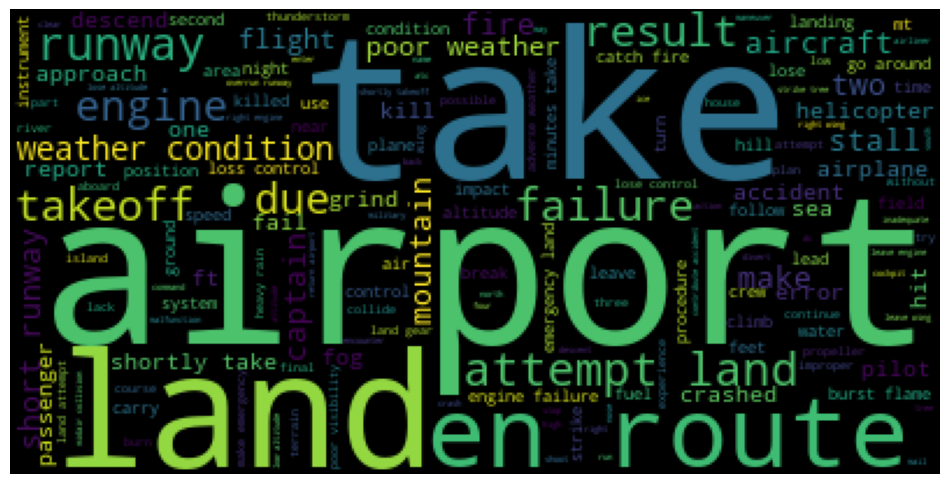

In [61]:
width = 12
height = 12
plt.figure(figsize=(width, height))
#text = 'all your base are belong to us all of your base base base'
wc = WordCloud().generate(" ".join(word_list_lemmitized))
plt.imshow(wc)
# wordcloud = WordCloud(font_path='/Library/Fonts/Gotham-Bold.otf',width=1800,height=1400).generate(str(hr1_filter))
# plt.imshow(wordcloud)
plt.axis("off")
plt.show()